In [2]:
import numpy as np 
import json
 
# Download the json file from the Carlini's website and put it in the same folder as this file
f = open('advex_papers_23_05.json')
 
# returns JSON object as a dictionary
data = json.load(f)
 
# Iterating through the json list
data_structure = ['pub_date', # <class 'str'> 2022-02-11
    'link', # <class 'str'> http://arxiv.org/abs/2202.05687
    'title', # <class 'str'> Towards Adversarially Robust Deepfake Detection: An Ensemble Approach. (98%)
    'authors', # <class 'list'> ['Ashish Hooda', ' Neal Mangaokar', ' Ryan Feng', ' Kassem Fawaz', ' Somesh Jha', ' Atul Prakash']
    'abstract', # <class 'str'>   Detecting deepfakes is an important problem, but recent work has shown that
    ]

for i, d in enumerate(data):
    if i > 0: 
        continue
    for a in d:
        print(type(a), a)
 
# Closing file
f.close()


<class 'str'> 2023-05-25
<class 'str'> http://arxiv.org/abs/2305.15792
<class 'str'> IDEA: Invariant Causal Defense for Graph Adversarial Robustness. (99%)
<class 'list'> ['Shuchang Tao', ' Qi Cao', ' Huawei Shen', ' Yunfan Wu', ' Bingbing Xu', ' Xueqi Cheng']
<class 'str'>   Graph neural networks (GNNs) have achieved remarkable success in various
tasks, however, their vulnerability to adversarial attacks raises concerns for
the real-world applications. Existing defense methods can resist some attacks,
but suffer unbearable performance degradation under other unknown attacks. This
is due to their reliance on either limited observed adversarial examples to
optimize (adversarial training) or specific heuristics to alter graph or model
structures (graph purification or robust aggregation). In this paper, we
propose an Invariant causal DEfense method against adversarial Attacks (IDEA),
providing a new perspective to address this issue. The method aims to learn
causal features that possess 

# List cummulative number of papers per year

2013 1
2014 4
2015 15
2016 42
2017 182
2018 501
2019 790
2020 1221
2021 1710
2022 1949
2023 743
Total number of papers: 7158


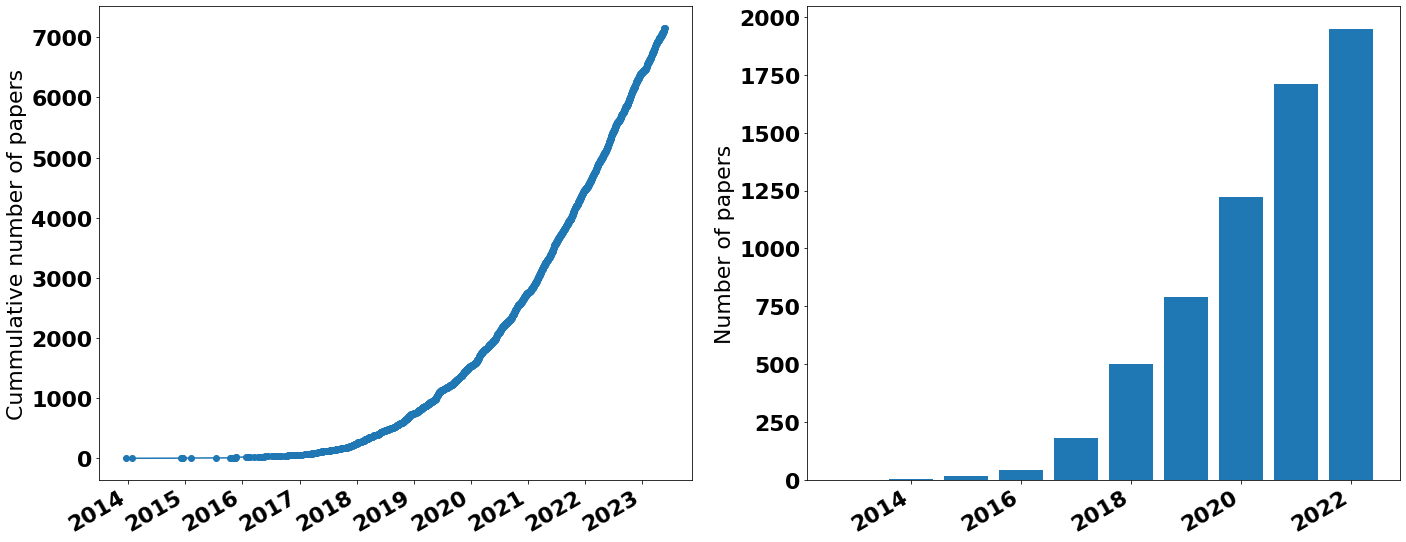

In [6]:
# Read pub_date and count number of paper per year 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import datetime

# ----- Adjust Font size ------ 
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

def get_date(pub_date):
    """" 2023-05-25 
    return 2023, 05, 25
    
    """
    d = pub_date.split('-') # ['2023', '05', '25']
    d = [int(i) for i in d] 
    return datetime.date(d[0], d[1], d[2])

papers_per_date = {}
papers_per_year = {}
for i, paper in enumerate(data[::-1]):
    pub_date = paper[0]
    pub_date = get_date(pub_date)
    pub_year = pub_date.year 

    if pub_date not in papers_per_date:
        papers_per_date[pub_date] = 1
    else:
        papers_per_date[pub_date] += 1

    if pub_year not in papers_per_year:
        papers_per_year[pub_year] = 1
    else:
        papers_per_year[pub_year] += 1



x,v = zip(*papers_per_date.items())
v = np.cumsum(v)

# Print number of papers per year 
for year in papers_per_year:
    print(year, papers_per_year[year])

print('Total number of papers:', v[-1])

# ----- Plot figures side by side 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
ax1.plot(x, v, '-o')
fig.autofmt_xdate()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.set_ylabel('Cummulative number of papers')
# ax1.set_xlabel('Year')

del papers_per_year[2023] # delete 2023 because it is not complete
papers_per_year = dict(sorted(papers_per_year.items()))
ax2.bar(papers_per_year.keys(), papers_per_year.values())
ax2.set_ylabel('Number of papers')
# ax2.set_xlabel('Year')

fig.tight_layout()
plt.savefig('figures/papers_per_year_side_by_side.png', dpi=300, bbox_inches='tight')


# Who published the most papers?

In [7]:
def clean_title(title): 
    if '%' in title[-5:]:
        assert '(' in title, title
        start = title.find('(',-5,-1)
        assert start > 0, title
        return title[:start-1]
    else: 
        return title


In [8]:
authors_dict = dict()
first_author_dict = dict()

for i, paper in enumerate(data): 
    # if i > 2: 
    #     continue
    title = paper[2]
    title = clean_title(title)
    authors = paper[3]
    for author in authors: 
        if author not in authors_dict.keys(): 
            authors_dict[author] = dict()
            authors_dict[author]['num_papers'] = 1
            authors_dict[author]['papers'] = [title]
        else: 
            authors_dict[author]['num_papers'] += 1
            authors_dict[author]['papers'].append(title)
        
    fist_author = authors[0]
    if fist_author not in first_author_dict.keys():
        first_author_dict[fist_author] = dict()
        first_author_dict[fist_author]['num_papers'] = 1
        first_author_dict[fist_author]['papers'] = [title]        
    
    else: 
        first_author_dict[fist_author]['num_papers'] += 1
        first_author_dict[fist_author]['papers'].append(title)        


In [12]:
authods_num_papers = [authors_dict[au]['num_papers'] for au in authors_dict.keys()]
authods_list = [au for au in authors_dict.keys()]
idx_sort = np.argsort(authods_num_papers)[::-1]
authods_num_papers = [authods_num_papers[i] for i in idx_sort]
authods_list = [authods_list[i] for i in idx_sort]


first_authod_num_papers = [first_author_dict[au]['num_papers'] for au in first_author_dict.keys()]
first_authod_list = [au for au in first_author_dict.keys()]

idx_sort = np.argsort(first_authod_num_papers)[::-1]
first_authod_num_papers = [first_authod_num_papers[i] for i in idx_sort]
first_authod_list = [first_authod_list[i] for i in idx_sort]

print('Total individual authors: ', len(authors_dict.keys()))
print('Total papers: ', len(data))
print('Who has published most: {} with {} papers'.format(authods_list[0], authods_num_papers[0]) )
print('Who has published most as first-author: {} with {} papers'.format(first_authod_list[0], first_authod_num_papers[0]))

k = 10
print('--- Top-{} authors ---'.format(k))
for au, num in zip(authods_list[:k], authods_num_papers[:k]):
    print(au, num, '<br>')

print('--- Top-{} first author ---'.format(k))
for au, num in zip(first_authod_list[:k], first_authod_num_papers[:k]):
    print(au, num, '<br>')



Total individual authors:  18130
Total papers:  7158
Who has published most:  Bo Li with 93 papers
Who has published most as first-author: Jinyin Chen with 20 papers
--- Top-10 authors ---
 Bo Li 93 <br>
 Pin-Yu Chen 84 <br>
 Cho-Jui Hsieh 75 <br>
 Jun Zhu 59 <br>
 Sijia Liu 56 <br>
 Hang Su 51 <br>
 Yang Liu 46 <br>
 Battista Biggio 44 <br>
 Soheil Feizi 44 <br>
 Huan Zhang 40 <br>
--- Top-10 first author ---
Jinyin Chen 20 <br>
Nicholas Carlini 18 <br>
Francesco Croce 13 <br>
Yinpeng Dong 13 <br>
Nicolas Papernot 11 <br>
Jinyuan Jia 10 <br>
Mingfu Xue 10 <br>
Chawin Sitawarin 10 <br>
Ali Borji 10 <br>
Muzammal Naseer 10 <br>


In [5]:
print(authods_list[:10])

[' Bo Li', ' Pin-Yu Chen', ' Cho-Jui Hsieh', ' Jun Zhu', ' Sijia Liu', ' Hang Su', ' Yang Liu', ' Battista Biggio', ' Soheil Feizi', ' Huan Zhang']


In [10]:
print('--- Top-{} first author ---'.format(k))
for au, num in zip(first_authod_list[:k], first_authod_num_papers[:k]):
    print(au, num)

--- Top-20 first author ---
Jinyin Chen 20
Nicholas Carlini 18
Francesco Croce 13
Yinpeng Dong 13
Nicolas Papernot 11
Jinyuan Jia 10
Mingfu Xue 10
Chawin Sitawarin 10
Ali Borji 10
Muzammal Naseer 10
Chengyin Hu 10
Yiming Li 10
Tianyu Pang 10
Mohammad Esmaeilpour 9
Andras Rozsa 9
Utku Ozbulak 9
Hossein Hosseini 9
Xiaosen Wang 9
Hadi Salman 8
Jiefeng Chen 8
